In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [18]:
def clean_data(dataframe):
    dataframe.drop(columns='Unnamed: 0', inplace=True)
    dataframe['date'] = pd.to_datetime(dataframe['date'])
    
    dataframe['sale_year'] = pd.DatetimeIndex(dataframe['date']).year
    dataframe['sale_month'] = pd.DatetimeIndex(dataframe['date']).month

    return dataframe.head(5)

def no_bedrooms(dataframe, df2):
    index=dataframe.loc[dataframe.bedrooms == 0].index.to_list()
    dataframe.drop(dataframe.index[[index]], inplace=True)
    frames= [dataframe, df2]
    dataframe = pd.concat(frames)
    print(dataframe.shape)
    return dataframe

def price_distribution(dataframe):
    fig, ax = plt.subplots(figsize=(12,5))
    ax.hist(dataframe['price'], bins=100);
    ax.set_title('Housing Prices');
    
    
training_data = pd.read_csv('/Users/brendanferris/Desktop/kings_county_housing/kc_house_data_train.csv')
missing_vals = pd.read_csv('bedroomsfilled.csv')
holdout_data = pd.read_csv('/Users/brendanferris/Desktop/kings_county_housing/kc_house_data_train.csv')
clean_data(training_data)
clean_data(missing_vals)
training_data = no_bedrooms(training_data, missing_vals)
training_data

(17290, 23)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,...,0,1986,0,98058,47.4388,-122.162,2390,7700,2014,10
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,...,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014,8
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,...,0,1997,0,98006,47.5646,-122.129,3710,9685,2014,8
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,...,0,1990,0,98034,47.6995,-122.228,4050,14226,2015,3
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,...,0,2004,0,98052,47.6647,-122.083,2250,4050,2014,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2954400190,2014-06-24,1295650.0,4,4.50,4810,28008,2.0,0,0,...,0,1990,0,98053,47.6642,-122.069,4740,35061,2014,6
8,3980300371,2014-09-26,142000.0,1,0.75,290,20875,1.0,0,0,...,0,1954,0,98024,47.5308,-121.888,1620,22850,2014,9
9,2310060040,2014-09-25,240000.0,4,2.50,1810,5669,2.0,0,0,...,0,2003,0,98038,47.3493,-122.053,1810,5685,2014,9
10,6896300380,2014-10-02,228000.0,2,1.00,390,5900,1.0,0,0,...,0,1953,0,98118,47.5260,-122.261,2170,6000,2014,10


In [3]:
def multicolinear_features(data):
    df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    df['pairs'] = list(zip(df.level_0, df.level_1))
    df.set_index(['pairs'], inplace = True)
    df.drop(columns=['level_1', 'level_0'], inplace = True)
    df.columns = ['cc']
    return df[(df.cc>.75) & (df.cc <1)]

In [25]:
set(training_data.zipcode.to_list())

{98001,
 98002,
 98003,
 98004,
 98005,
 98006,
 98007,
 98008,
 98010,
 98011,
 98014,
 98019,
 98022,
 98023,
 98024,
 98027,
 98028,
 98029,
 98030,
 98031,
 98032,
 98033,
 98034,
 98038,
 98039,
 98040,
 98042,
 98045,
 98052,
 98053,
 98055,
 98056,
 98058,
 98059,
 98065,
 98070,
 98072,
 98074,
 98075,
 98077,
 98092,
 98102,
 98103,
 98105,
 98106,
 98107,
 98108,
 98109,
 98112,
 98115,
 98116,
 98117,
 98118,
 98119,
 98122,
 98125,
 98126,
 98133,
 98136,
 98144,
 98146,
 98148,
 98155,
 98166,
 98168,
 98177,
 98178,
 98188,
 98198,
 98199}

In [5]:
training_data.drop(columns='date', inplace=True)

# Log Transform Sqft data

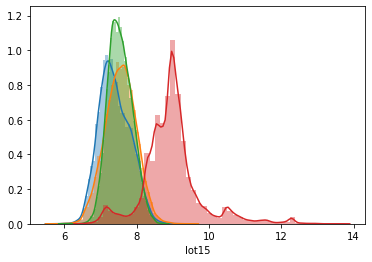

In [6]:
data_log = pd.DataFrame([])
data_log['above'] = np.log(training_data['sqft_above'])
data_log['living15'] = np.log(training_data['sqft_living15'])
data_log['lot15'] = np.log(training_data['sqft_lot15'])
data_log['living'] = np.log(training_data['sqft_living'])
sns.distplot(data_log['above']);
sns.distplot(data_log['living']);
sns.distplot(data_log['living15']);
sns.distplot(data_log['lot15']);

# Min/Max Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

beds = training_data['bedrooms']
beds_max = max(training_data['bedrooms'])
beds_min = min(training_data['bedrooms'])
baths = training_data['bathrooms']
baths_max = max(training_data['bathrooms'])
baths_min = min(training_data['bathrooms'])

training_data['bedrooms'] = (beds - beds_min)/(beds_max-beds_min)
training_data['bathrooms'] = (baths - baths_min)/(baths_max-baths_min)

training_data[['sqft_living15', 'sqft_above', 'sqft_basement', 'sqft_lot']] = scaler.fit_transform(training_data[['sqft_living15', 'sqft_above', 'sqft_basement', 'sqft_lot']])  

# Dummies

In [8]:
waterfront_dummies = pd.get_dummies(training_data['waterfront'], prefix='waterf', drop_first=True)
view_dummies = pd.get_dummies(training_data['view'], prefix='has_view', drop_first=True)
condition_dummies = pd.get_dummies(training_data['condition'], prefix='condition', drop_first=True)
grade_dummies = pd.get_dummies(training_data['grade'], prefix='grade', drop_first=True)
month_dummies = pd.get_dummies(training_data['sale_month'], prefix='month', drop_first=True)
zip_dummies = pd.get_dummies(training_data['zipcode'], prefix='zip', drop_first=True)

training_data = training_data.drop(['id','zipcode','sale_month','waterfront', 'view', 'condition', 'grade'], axis=1)
training_data = pd.concat([training_data, waterfront_dummies, view_dummies, condition_dummies, grade_dummies, month_dummies, zip_dummies], axis=1)
training_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,365000.0,0.09375,0.28125,2070,0.005041,2.0,0.195175,0.000000,1986,0,...,0,0,0,0,0,0,0,0,0,0
1,865000.0,0.12500,0.37500,2900,0.003730,1.0,0.168860,0.221992,1977,0,...,0,0,0,0,0,0,0,0,0,0
2,1038000.0,0.09375,0.31250,3770,0.006252,2.0,0.381579,0.000000,1997,0,...,0,0,0,0,0,0,0,0,0,0
3,1490000.0,0.06250,0.43750,4560,0.008503,2.0,0.468202,0.000000,1990,0,...,0,0,0,0,0,0,0,0,0,0
4,711000.0,0.06250,0.31250,2550,0.002910,2.0,0.247807,0.000000,2004,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,1295650.0,0.09375,0.56250,4810,0.016620,2.0,0.495614,0.000000,1990,0,...,0,0,0,0,0,0,0,0,0,0
8,142000.0,0.00000,0.09375,290,0.012299,1.0,0.000000,0.000000,1954,0,...,0,0,0,0,0,0,0,0,0,0
9,240000.0,0.09375,0.31250,1810,0.003088,2.0,0.166667,0.000000,2003,0,...,0,0,0,0,0,0,0,0,0,0
10,228000.0,0.03125,0.12500,390,0.003228,1.0,0.010965,0.000000,1953,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
training_data.drop(['sqft_living', 'condition_3'], axis=1, inplace=True)

# Colinnear Features

In [10]:
multicolinear_features(training_data)

,cc
pairs,


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

y = training_data.price
x = training_data.drop('price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.2)
x_train.shape, x_test.shape

((13832, 112), (3458, 112))

In [12]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)
MSE = mean_squared_error(y_test, y_hat)
np.sqrt(MSE)

152638.65221691132

In [13]:
np.mean(cross_val_score(estimator=lr, X=x_train, y=y_train, cv=30))

0.8293599262245991

# Recursive Feature Selection

In [14]:
rfe = RFE(estimator=lr, n_features_to_select=50, step=1)
rfe = rfe.fit(x_train, y_train)
rfe

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=50, step=1, verbose=0)

In [15]:
selected_rfe_features= pd.DataFrame({'Feature': list(x_train.columns),
                                    'Ranking': rfe.ranking_})

selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,bedrooms,1
45,zip_98004,1
46,zip_98005,1
47,zip_98006,1
48,zip_98007,1
...,...,...
82,zip_98092,59
109,zip_98188,60
6,yr_built,61
7,yr_renovated,62


In [16]:
training_data

,price,bedrooms,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,365000.0,0.09375,0.28125,0.005041,2.0,0.195175,0.000000,1986,0,47.4388,...,0,0,0,0,0,0,0,0,0,0
1,865000.0,0.12500,0.37500,0.003730,1.0,0.168860,0.221992,1977,0,47.6784,...,0,0,0,0,0,0,0,0,0,0
2,1038000.0,0.09375,0.31250,0.006252,2.0,0.381579,0.000000,1997,0,47.5646,...,0,0,0,0,0,0,0,0,0,0
3,1490000.0,0.06250,0.43750,0.008503,2.0,0.468202,0.000000,1990,0,47.6995,...,0,0,0,0,0,0,0,0,0,0
4,711000.0,0.06250,0.31250,0.002910,2.0,0.247807,0.000000,2004,0,47.6647,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,1295650.0,0.09375,0.56250,0.016620,2.0,0.495614,0.000000,1990,0,47.6642,...,0,0,0,0,0,0,0,0,0,0
8,142000.0,0.00000,0.09375,0.012299,1.0,0.000000,0.000000,1954,0,47.5308,...,0,0,0,0,0,0,0,0,0,0
9,240000.0,0.09375,0.31250,0.003088,2.0,0.166667,0.000000,2003,0,47.3493,...,0,0,0,0,0,0,0,0,0,0
10,228000.0,0.03125,0.12500,0.003228,1.0,0.010965,0.000000,1953,0,47.5260,...,0,0,0,0,0,0,0,0,0,0
